   Bedroom_count  Bathroom_count  Ages  Garage_count  Sqm   Latitude  \
0              5               3  2024             1  162  49.223110   
1              2               2  2010             1  116  49.254072   
2              2               2  1997             3  137  49.274651   
3              2               2  1965             1  103  49.290611   
4              3               2  2012             2  164  49.283756   

    Longitude    Price  
0 -123.074332  2058000  
1 -123.234705  1598000  
2 -123.117816  1499000  
3 -123.144247  1499000  
4 -123.118620  2690000  


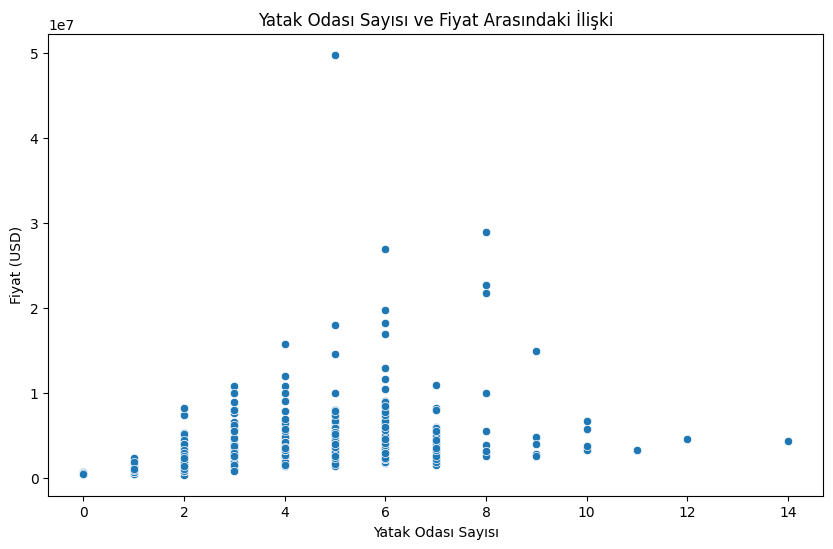

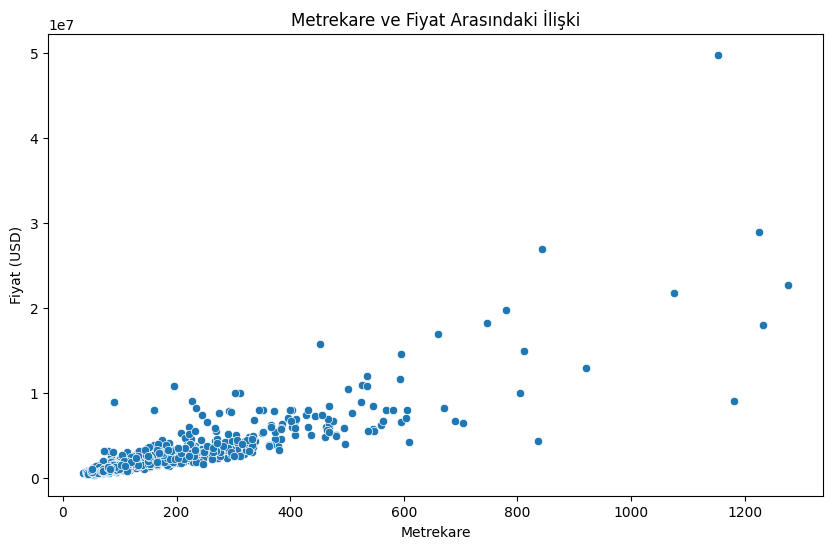

C:\Users\HakanCabbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HakanCabbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


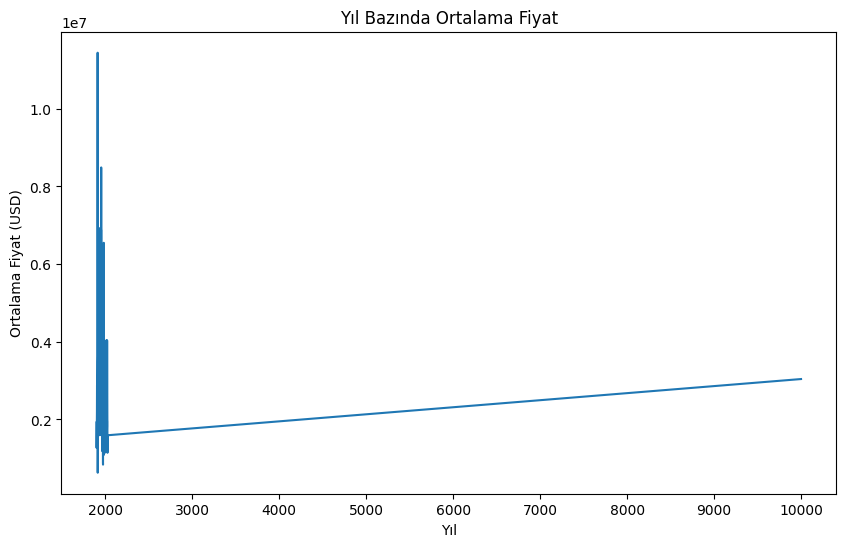

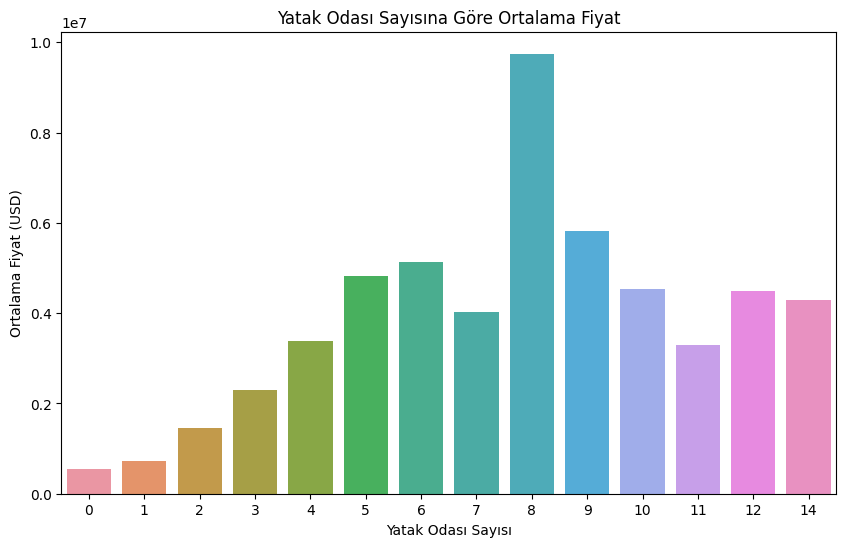

C:\Users\HakanCabbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HakanCabbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


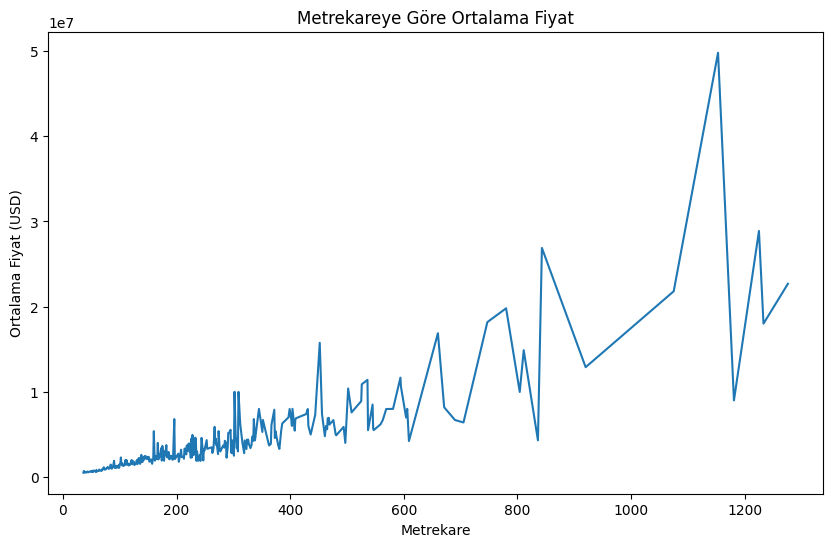

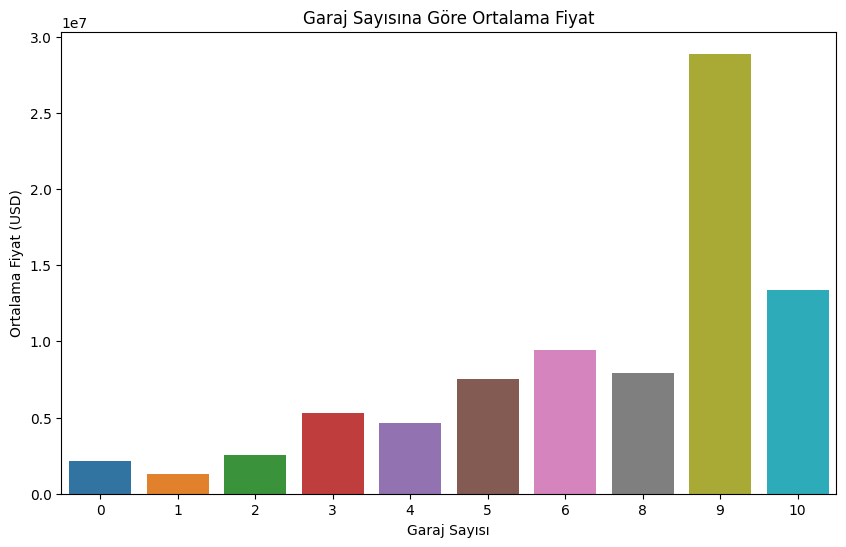

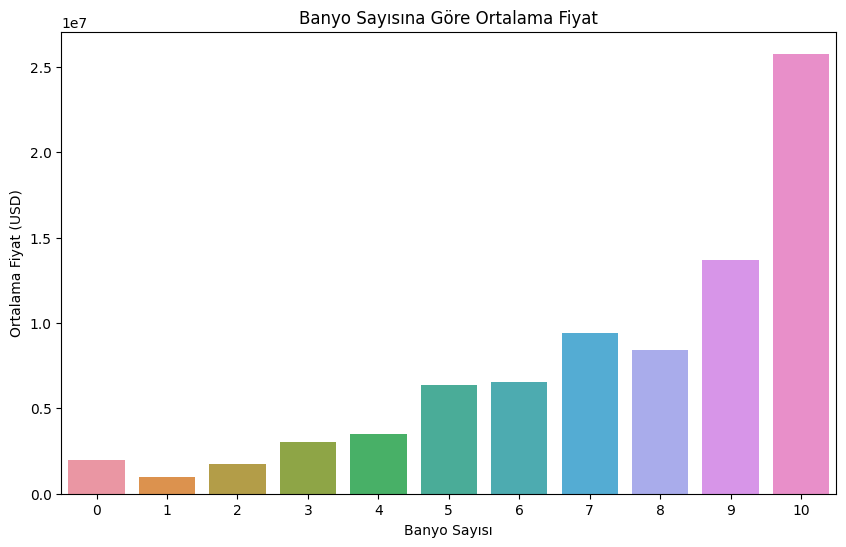

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Excel dosyasını oku (dosyanın adı ve yolunu doğru şekilde belirtin)
df = pd.read_excel('cleaned_data_excel.xlsx')  # Excel dosyasının adı ve yolu

# Veriyi kontrol et
print(df.head())

# Veriyi Temizleme ve Düzenleme
# 'Price' sütununu sayısal verilere dönüştür
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 'Bedroom_count', 'Bathroom_count', 'Ages', 'Garage_count', 'Sqm' sütunlarını sayısal verilere dönüştür
df['Bedroom_count'] = pd.to_numeric(df['Bedroom_count'], errors='coerce')
df['Bathroom_count'] = pd.to_numeric(df['Bathroom_count'], errors='coerce')
df['Ages'] = pd.to_numeric(df['Ages'], errors='coerce')
df['Garage_count'] = pd.to_numeric(df['Garage_count'], errors='coerce')
df['Sqm'] = pd.to_numeric(df['Sqm'], errors='coerce')

# Eksik verileri temizle (fiyat, yatak odası, vb. eksik veriler)
df_cleaned = df.dropna(subset=['Price', 'Bedroom_count', 'Sqm', 'Ages', 'Garage_count', 'Bathroom_count'])

# Fiyat ve yatak odası sayısı arasındaki ilişkiyi gösteren bir scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bedroom_count', y='Price', data=df_cleaned)
plt.title('Yatak Odası Sayısı ve Fiyat Arasındaki İlişki')
plt.xlabel('Yatak Odası Sayısı')
plt.ylabel('Fiyat (USD)')
plt.show()

# Fiyat ve metrekare arasındaki ilişkiyi gösteren bir scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sqm', y='Price', data=df_cleaned)
plt.title('Metrekare ve Fiyat Arasındaki İlişki')
plt.xlabel('Metrekare')
plt.ylabel('Fiyat (USD)')
plt.show()

# Fiyatların yaşa göre ortalamasını görmek için
avg_price_by_age = df_cleaned.groupby('Ages')['Price'].mean().reset_index()

# Yıl bazında ortalama fiyatı gösteren bir line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Ages', y='Price', data=avg_price_by_age)
plt.title('Yıl Bazında Ortalama Fiyat')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Fiyat (USD)')
plt.show()

# Fiyatların yatak odası sayısına göre ortalamasını görmek için
avg_price_by_bedroom = df_cleaned.groupby('Bedroom_count')['Price'].mean().reset_index()

# Yatak odası sayısına göre ortalama fiyatı gösteren bir bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Bedroom_count', y='Price', data=avg_price_by_bedroom)
plt.title('Yatak Odası Sayısına Göre Ortalama Fiyat')
plt.xlabel('Yatak Odası Sayısı')
plt.ylabel('Ortalama Fiyat (USD)')
plt.show()

# Fiyatların metrekareye göre ortalamasını görmek için
avg_price_by_sqft = df_cleaned.groupby('Sqm')['Price'].mean().reset_index()

# Metrekareye göre ortalama fiyatı gösteren bir line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sqm', y='Price', data=avg_price_by_sqft)
plt.title('Metrekareye Göre Ortalama Fiyat')
plt.xlabel('Metrekare')
plt.ylabel('Ortalama Fiyat (USD)')
plt.show()

# Fiyatların garaj sayısına göre ortalamasını görmek için
avg_price_by_garage = df_cleaned.groupby('Garage_count')['Price'].mean().reset_index()

# Garaj sayısına göre ortalama fiyatı gösteren bir bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Garage_count', y='Price', data=avg_price_by_garage)
plt.title('Garaj Sayısına Göre Ortalama Fiyat')
plt.xlabel('Garaj Sayısı')
plt.ylabel('Ortalama Fiyat (USD)')
plt.show()

# Fiyatların banyo sayısına göre ortalamasını görmek için
avg_price_by_bathroom = df_cleaned.groupby('Bathroom_count')['Price'].mean().reset_index()

# Banyo sayısına göre ortalama fiyatı gösteren bir bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Bathroom_count', y='Price', data=avg_price_by_bathroom)
plt.title('Banyo Sayısına Göre Ortalama Fiyat')
plt.xlabel('Banyo Sayısı')
plt.ylabel('Ortalama Fiyat (USD)')
plt.show()
